In [1]:
#imports and raw data
import numpy as np
import pandas as pd
import matplotlib as plt
plt.rc("font", size=10)
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
raw_data = pd.read_csv(r'train.csv')

In [3]:
raw_data.head()

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [4]:
#Visualize target
target = raw_data['depressed'].value_counts()

<AxesSubplot:xlabel='depressed', ylabel='count'>

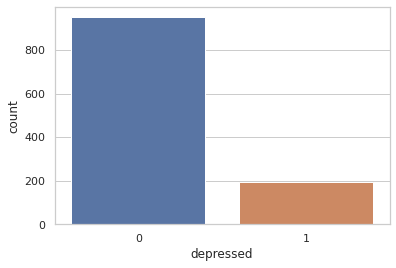

In [5]:
sns.countplot(x='depressed',data=raw_data)

In [6]:
#Depressed%
target[1]/(target[1]+target[0])

0.16885389326334208

In [7]:
#cleaning.

raw_data.head(10)

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
6,849,130,31-Oct-61,0,34.0,0,1,3,9,1,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,3
7,1386,72,03-Sep-61,1,21.0,1,2,4,10,2,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,1
8,930,195,12-Nov-61,1,32.0,1,7,9,9,7,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,1
9,390,33,28-Nov-61,1,29.0,1,4,6,10,0,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3


In [8]:
raw_data.columns

Index(['surveyid', 'village', 'survey_date', 'femaleres', 'age', 'married',
       'children', 'hhsize', 'edu', 'hh_children', 'hh_totalmembers',
       'cons_nondurable', 'asset_livestock', 'asset_durable', 'asset_phone',
       'asset_savings', 'asset_land_owned_total', 'asset_niceroof',
       'cons_allfood', 'cons_ownfood', 'cons_alcohol', 'cons_tobacco',
       'cons_med_total', 'cons_med_children', 'cons_ed', 'cons_social',
       'cons_other', 'ent_wagelabor', 'ent_ownfarm', 'ent_business',
       'ent_nonagbusiness', 'ent_employees', 'ent_nonag_revenue',
       'ent_nonag_flowcost', 'ent_farmrevenue', 'ent_farmexpenses',
       'ent_animalstockrev', 'ent_total_cost', 'fs_adskipm_often',
       'fs_adwholed_often', 'fs_chskipm_often', 'fs_chwholed_often', 'fs_meat',
       'fs_enoughtom', 'fs_sleephun', 'med_expenses_hh_ep',
       'med_expenses_sp_ep', 'med_expenses_child_ep',
       'med_portion_sickinjured', 'med_port_sick_child', 'med_afford_port',
       'med_sickdays_hhave

In [9]:
# 'surveyid' unique identfier
# 'hh_totalmembers' dependent on 'hh_children'
# NaN present


#expenses and assets
raw_data[['cons_nondurable', 'asset_livestock', 'asset_durable', 'asset_phone',
       'asset_savings', 'asset_land_owned_total', 'asset_niceroof',
       'cons_allfood', 'cons_ownfood', 'cons_alcohol', 'cons_tobacco',
       'cons_med_total', 'cons_med_children', 'cons_ed', 'cons_social',
       'cons_other','depressed']].head(10)

,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,depressed
0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0
1,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,1
2,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0
3,378.832920,526.671080,196.98904,24.023054,49.647648,0.0,0,289.173520,36.434967,0.0,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0
4,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,0
5,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0
6,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,1
7,118.070460,120.136330,203.23505,67.264557,48.046108,0.0,0,108.568010,6.099187,0.0,0.000000,0.000000,0.000000,2.856074,0.800768,5.845610,0
8,581.574160,1108.756800,252.24208,24.023054,80.076851,4.0,0,469.092860,40.572273,0.0,0.000000,0.000000,0.000000,15.134524,30.162281,67.184479,0
9,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0


In [10]:
raw_data[['asset_niceroof']].value_counts()

asset_niceroof
0                 1142
1                    1
dtype: int64

In [11]:
#enterprise income and expenses
raw_data[['ent_wagelabor', 'ent_ownfarm', 'ent_business',
       'ent_nonagbusiness', 'ent_employees', 'ent_nonag_revenue',
       'ent_nonag_flowcost', 'ent_farmrevenue', 'ent_farmexpenses',
       'ent_animalstockrev', 'ent_total_cost','depressed']].head(10)

,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,depressed
0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
2,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0
4,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0
5,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,0
6,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,1
7,0,0,1,0,0,0.000000,0.000000,9.275569,3.697993,0.000000,3.697993,0
8,1,0,0,0,0,0.000000,0.000000,32.564587,28.738691,24.690361,55.964821,0
9,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [12]:
#food security and medical
raw_data[['fs_adskipm_often',
       'fs_adwholed_often', 'fs_chskipm_often', 'fs_chwholed_often', 'fs_meat',
       'fs_enoughtom', 'fs_sleephun', 'med_expenses_hh_ep',
       'med_expenses_sp_ep', 'med_expenses_child_ep',
       'med_portion_sickinjured', 'med_port_sick_child', 'med_afford_port',
       'med_sickdays_hhave', 'med_healthconsult', 'med_vacc_newborns',
       'med_child_check', 'med_u5_deaths','depressed']]].head(10)

#'fs_chwholed_often','fs_adwholed_often' are dependent on 'fs_chskipm_often' and 'fs_adwholed_often'
# ,'med_expenses_hh_ep' dependent on 'med_expenses_sp_ep' and 'med_expenses_child_ep'


SyntaxError: unmatched ']' (<ipython-input-12-2440bdedbe18>, line 8)

In [13]:
#education
raw_data[['ed_expenses', 'ed_expenses_perkid',
       'ed_schoolattend', 'ed_sch_missedpc', 'ed_work_act_pc', 'labor_primary',
       'wage_expenditures', 'durable_investment', 'nondurable_investment',
       'given_mpesa', 'amount_given_mpesa', 'received_mpesa',
       'amount_received_mpesa', 'net_mpesa', 'saved_mpesa',
       'amount_saved_mpesa','depressed']].head(10)
#ed_expenses dependent on 'ed_expenses_perkid' and 'children'


,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,depressed
0,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0
1,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,1
2,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0
3,20.179367,10.089684,0.500000,1.500000,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0
4,27.226130,6.806532,0.750000,1.750000,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0
5,32.030739,6.406148,0.800000,0.000000,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.000000,0
6,6.406148,6.406148,1.000000,0.000000,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000000,0.000000,0,0.000000,1
7,34.272892,17.136446,0.500000,0.000000,NaN,0,0,339.22659,54.600174,0,0.0,0,0.000000,0.000000,0,0.000000,0
8,181.614290,30.269049,0.666667,0.166667,1.00,1,0,1401.83810,151.176190,0,0.0,0,0.000000,0.000000,0,0.000000,0
9,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,0,0.000000,0


In [14]:
raw_data[['wage_expenditures']].value_counts()

wage_expenditures
0                    1141
27000                   1
840                     1
dtype: int64

In [15]:
raw_data[['received_mpesa']].value_counts()

received_mpesa
0                 1067
1                   76
dtype: int64

In [16]:
raw_data[['given_mpesa']].value_counts()

given_mpesa
0              1125
1                18
dtype: int64

In [17]:
#Drop dependent features

df = raw_data.drop(['surveyid', 'village','survey_date','ed_expenses','med_expenses_sp_ep','med_expenses_child_ep','fs_chwholed_often','fs_adwholed_often' 
],1)

In [18]:
#fill Nan 
df = df.fillna(0)

In [19]:
df

,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,...,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,1,28.0,1,4,6,10,0,0.0,0.000000,0.000000,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,1,23.0,1,3,5,8,0,0.0,0.000000,0.000000,...,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1,22.0,1,3,5,9,0,0.0,0.000000,0.000000,...,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1,27.0,1,2,4,10,2,4.0,378.832920,526.671080,...,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1,36.0,0,4,5,9,0,0.0,0.000000,0.000000,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,4
1139,1,23.0,1,0,2,10,0,2.0,93.073326,8.260629,...,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,4
1140,1,28.0,1,5,7,10,5,7.0,387.758820,8.260629,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5
1141,1,33.0,0,4,5,9,0,0.0,0.000000,0.000000,...,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,5


In [20]:
# seperate dependents and indepdent features
x=df.loc[:, df.columns != 'depressed']
y=df.loc[:, df.columns == 'depressed']

In [29]:
#over smapling to get equal representation od dependent
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state =0)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)
columns = x_train.columns


os_data_x, os_data_y = os.fit_resample(x_train, y_train)

In [30]:
len(os_data_x)

1314

In [31]:
os_data_x = pd.DataFrame(data = os_data_x, columns=columns)
os_data_y = pd.DataFrame(data = os_data_y, columns=['depressed'])

In [37]:
print(len(os_data_x))
print(len(os_data_y[os_data_y['depressed']==1]))

1314
657


In [56]:
#RFE

#get feature labels
df_columns = df.columns.values.tolist()
ylabel = ['depressed']
xlabel = [label for label in df_columns if label not in ylabel]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#increased max iterations for logistic until no longer max iteration limit reached 
lr = LogisticRegression(max_iter=12000)

rfe = RFE(lr,20)
rfe = rfe.fit(os_data_x, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)




/home/franciswalker/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


[ True False  True False False  True  True  True False False False False
 False False False False False False False False False False False False
  True  True  True  True False False False False False False False False
 False False  True False False  True False False False  True False False
  True False False False  True  True False False False  True False  True
 False False  True False  True  True]
[ 1 40  1 35 11  1  1  1  5 38 36 41 24 20 46  7 31  6 22  3 32  9  8  4
  1  1  1  1 10 45 18 34 17 30 19 21 29 12  1  2 28  1 13 14 27  1 23 26
  1 33 15 16  1  1 47 37 25  1 39  1 44 42  1 43  1  1]


In [63]:
selected_features = np.array([ xlabel,rfe.support_])
selected_features = pd.DataFrame(selected_features).transpose()

In [93]:
features = selected_features.loc[selected_features[1]=='True']

In [94]:
features=features.iloc[:,0:1].values.tolist()

In [102]:
features

[['femaleres'],
 ['married'],
 ['edu'],
 ['hh_children'],
 ['hh_totalmembers'],
 ['ent_wagelabor'],
 ['ent_ownfarm'],
 ['ent_business'],
 ['ent_nonagbusiness'],
 ['fs_enoughtom'],
 ['med_portion_sickinjured'],
 ['med_healthconsult'],
 ['med_u5_deaths'],
 ['ed_work_act_pc'],
 ['labor_primary'],
 ['given_mpesa'],
 ['received_mpesa'],
 ['saved_mpesa'],
 ['early_survey'],
 ['day_of_week']]

In [112]:
flat_list = ['femaleres', 'married', 'edu', 'hh_children', 'hh_totalmembers',
       'ent_wagelabor', 'ent_ownfarm', 'ent_business',
       'ent_nonagbusiness', 'fs_enoughtom', 'med_portion_sickinjured',
       'med_healthconsult', 'med_u5_deaths', 'ed_work_act_pc',
       'labor_primary', 'given_mpesa', 'received_mpesa', 'saved_mpesa',
       'early_survey', 'day_of_week']

In [113]:
X=os_data_x[flat_list]
Y = os_data_y['depressed']

import statsmodels.api as sm

logit_model = sm.Logit(Y,X)
result=logit_model.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.539353
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.222     
Dependent Variable:   depressed          AIC:                1457.4195 
Date:                 2021-03-24 16:48   BIC:                1561.0361 
No. Observations:     1314               Log-Likelihood:     -708.71   
Df Model:             19                 LL-Null:            -910.80   
Df Residuals:         1294               LLR p-value:        5.9473e-74
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
femaleres                1.0334   0.1816  5.6902 0.0000  0.6774  1.3893
married                 -1.2176   0.1642 -7.4134 0.0000 -1.5395 -0.8957
edu                     -0.0265   0.0195 -1.3631 0.1729 -0.0646  0.0116
hh_children             -0.6885   0.1202 -5.7301 0.0000 -0.9240 -0.4530
hh_totalmembers          0.7253   0.0926  7.8286 0.0000  0.5437  0.9068
ent_wagelabor            0.0309   0.4511  0.0685 0.9454 -0.8533  0.9151
ent_ownfarm             -1.9553   0.2071 -9.4424 0.0000 -2.3611 -1.5494
ent_business            -1.7002   0.3448 -4.9315 0.0000 -2.3759 -1.0245
ent_nonagbusiness       -0.9999   0.2160 -4.6283 0.0000 -1.4233 -0.5765
fs_enoughtom            -0.2718   0.2069 -1.3139 0.1889 -0.6772  0.1336
med_portion_sickinjured -0.6593   0.2763 -2.3860 0.0170 -1.2009 -0.1177
med_healthconsult        0.8707   0.2292  3.7993 0.0001  0.4215  1.3199
med_u5_deaths           -0.5633   0.6785 -0.8301 0.4065 -1.8932  0.7666
ed_work_act_pc          -0.2261   0.1307 -1.7298 0.0837 -0.4823  0.0301
labor_primary           -1.7751   0.4393 -4.0410 0.0001 -2.6361 -0.9141
given_mpesa             -1.9249   1.0869 -1.7711 0.0766 -4.0551  0.2053
received_mpesa          -0.4243   0.3389 -1.2520 0.2106 -1.0886  0.2400
saved_mpesa             -0.9149   0.2166 -4.2235 0.0000 -1.3395 -0.4903
early_survey            -0.9439   0.3072 -3.0729 0.0021 -1.5459 -0.3419
day_of_week             -0.0011   0.0379 -0.0287 0.9771 -0.0753  0.0732
=======================================================================

"""

In [114]:
#P values for most are below 0.05. Remove those above
flat_list = ['femaleres', 'married', 'hh_children', 'hh_totalmembers', 'ent_ownfarm', 'ent_business',
       'ent_nonagbusiness', 'med_portion_sickinjured',
       'med_healthconsult', 'ed_work_act_pc',
       'labor_primary', 'saved_mpesa',
       'early_survey']

X=os_data_x[flat_list]
Y = os_data_y['depressed']

import statsmodels.api as sm

logit_model = sm.Logit(Y,X)
result=logit_model.fit()
result.summary2()


Optimization terminated successfully.
         Current function value: 0.544137
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.215     
Dependent Variable:   depressed          AIC:                1455.9915 
Date:                 2021-03-24 16:48   BIC:                1523.3423 
No. Observations:     1314               Log-Likelihood:     -715.00   
Df Model:             12                 LL-Null:            -910.80   
Df Residuals:         1301               LLR p-value:        2.2717e-76
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
femaleres                0.8850   0.1392  6.3593 0.0000  0.6122  1.1578
married                 -1.3257   0.1536 -8.6281 0.0000 -1.6268 -1.0245
hh_children             -0.6855   0.1177 -5.8229 0.0000 -0.9163 -0.4548
hh_totalmembers          0.7166   0.0904  7.9242 0.0000  0.5394  0.8938
ent_ownfarm             -2.0110   0.2034 -9.8851 0.0000 -2.4097 -1.6123
ent_business            -1.7314   0.3421 -5.0613 0.0000 -2.4019 -1.0609
ent_nonagbusiness       -1.0067   0.2138 -4.7078 0.0000 -1.4257 -0.5876
med_portion_sickinjured -0.7124   0.2717 -2.6219 0.0087 -1.2450 -0.1799
med_healthconsult        0.8265   0.2259  3.6590 0.0003  0.3838  1.2693
ed_work_act_pc          -0.2161   0.1283 -1.6842 0.0921 -0.4675  0.0354
labor_primary           -1.7564   0.2096 -8.3791 0.0000 -2.1672 -1.3456
saved_mpesa             -1.0038   0.2121 -4.7333 0.0000 -1.4195 -0.5882
early_survey            -0.9269   0.3010 -3.0793 0.0021 -1.5168 -0.3369
=======================================================================

"""

In [116]:
# fitting the Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=0)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [118]:
y_pred = lr.predict(x_test)
print('Accurancy of logistic regression on test set: {:.2f}'.format(lr.score(x_test,y_test)))

Accurancy of logistic regression on test set: 0.73
